Zadanie1: Podziel wyjściowy zbiór sentencji $treebank.tagged\_sents()$ na dwa zbiory: pierwsze 3000 sentencje zapisz pod zmienną  $trained$, natomiast pozostałe sentencje zapisz pod zmienną $tested$. Zbuduj model tylko w oparciu o $trained$. Następnie wykonaj ewaluacje modelu zarówno na  $trained$  jak i  $tested$. Zastanów się z czego mogą wynikać rozbieżności.

In [2]:
from nltk.corpus import treebank
trained = treebank.tagged_sents()[:3000]
tested = treebank.tagged_sents()[3000:]

from nltk.tag import hmm  #Ukryte modele Markowa

trainer = hmm.HiddenMarkovModelTrainer() #buduje model HMMM
tagger = trainer.train_supervised(trained) #trenuje model (metoda największej wiarygodności) na wszystkich otagowanych sentencjach z treebank

In [3]:
print(f"Tested: {tagger.accuracy(tested)}")
print(f"Trained: {tagger.accuracy(trained)}")  

c:\Users\kajaw\miniconda3\envs\Pbioinf1.2\Lib\site-packages\nltk\tag\hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
c:\Users\kajaw\miniconda3\envs\Pbioinf1.2\Lib\site-packages\nltk\tag\hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
c:\Users\kajaw\miniconda3\envs\Pbioinf1.2\Lib\site-packages\nltk\tag\hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
c:\Users\kajaw\miniconda3\envs\Pbioinf1.2\Lib\site-packages\nltk\tag\hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Tested: 0.36844377293330455
Trained: 0.981615512636916


In [4]:
#accuracy ranomowego przypisania

import random

# wyciągamy tagi z treebank
# struktura treebank.tagged_sents(): [[(wor,tag), ..., ()], [another sentence], ..., []]
all_tags = list(set(tag for sentence in treebank.tagged_sents() for word, tag in sentence))

# przypisanie losowych tagów
def random_tagger(sentences):
    return [[(word, random.choice(all_tags)) for word, tag in sent] for sent in sentences]

random_tagged_sentences = random_tagger(treebank.tagged_sents())

print(f"Random: {tagger.accuracy(random_tagged_sentences)}") 


Random: 0.021186777384878223


<h3> Porcjowanie (Chunking)


In [5]:
text = "The Very Large Telescope (VLT) of the European Southern Observatory (ESO), an array of four individual telescopes in the Atacama desert, has given us a huge amount of new data about the universe. Researchers have now used it to find a group of six galaxies around a supermassive black hole, from when the Universe was just 0.9 billion years old - it's estimated to be 13.8 billion years old now. Black holes are thought to sit at the center of galaxies including the Milky Way. "
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(text.lower()) #podzial na zdania
tokens_sen1 = word_tokenize(sentences[0]) #pierwsze słowa ze zdań

from nltk import pos_tag #Części mowy
tags = pos_tag(tokens_sen1)

<h4> Zadanie2: Zapisz do listy wszystkie chunki występujące w tekście a spełniajacy zadany (przez siebie) warunek.

In [6]:
from nltk.chunk import RegexpParser

grammar = "chunk: {<RB>+<JJ.?>*<NN>}" #DT - determiner/określnik, JJ - adjective/przymiotnik, NN - noun/rzeczonik
chunker = RegexpParser(grammar) 
result = chunker.parse(tags) #tags zdefiniowane bylo wyzej

In [7]:
result.draw() #rysowanie tego co wyzej (pojawia sie nowe okno)

<h4> Zadanie3: Zinterpretuj poniższy chunk.

In [8]:
grammar = "chunk: {<NN.?>*<VBD.?>*<JJ.?>*<CC>?}" #co oznacza wyrazenie regularne zapisane w {}?
chunker = RegexpParser(grammar) 
result = chunker.parse(tags) #tags zdefiniowane bylo wyzej
result.draw()

#<NN.?>* zero lub więcej (NN plus 0 lub 1 znak (czyli NN, NNS, NNP, NNPS))
#<VBD.?>* analoogicznie
#<JJ.?>* analogicznie
#<CC>? CC 0 lub 1 razy

<h4> Zadanie4: Pobierz dowolny tekst (przez f = open(...)). Następnie wyznacz dla niego zaproponowany przez siebie chunk.

In [9]:
import pandas as pf
with open("example_text.txt") as file:
    example_text = file.read()

from nltk import sent_tokenize, word_tokenize

ex_sentences = sent_tokenize(example_text.lower()) #podzial na zdania
ex_tokens_sen1 = word_tokenize(ex_sentences[1]) 

from nltk import pos_tag #Części mowy
ex_text_tags = pos_tag(ex_tokens_sen1)

grammar = "chunk: {<NN.?>*<VBD>*<JJ.?>*<CC>?}" 
chunker = RegexpParser(grammar) 
result = chunker.parse(ex_text_tags) 
result.draw()

<h4> Zadanie5: Znajdz wszystkie byty (entity) w tekście poniżej.

In [10]:
txt = "Google, LLC is an American multinational technology company that specializes in Internet-related services and products, which include online advertising technologies, a search engine, cloud computing, software, and hardware. It is considered one of the Big Five technology companies in the U.S. information technology industry, alongside Amazon, Facebook, Apple, and Microsoft."

tokens_txt = word_tokenize(txt)
tags_txt = pos_tag(tokens_txt)
print(tags_txt)

from nltk import ne_chunk

namedEnt_txt = ne_chunk(tags_txt, binary = True) #przeszukiwanie pod kątem osób, miejsc itd...
print(namedEnt_txt)

[('Google', 'NNP'), (',', ','), ('LLC', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('American', 'JJ'), ('multinational', 'NN'), ('technology', 'NN'), ('company', 'NN'), ('that', 'WDT'), ('specializes', 'VBZ'), ('in', 'IN'), ('Internet-related', 'NNP'), ('services', 'NNS'), ('and', 'CC'), ('products', 'NNS'), (',', ','), ('which', 'WDT'), ('include', 'VBP'), ('online', 'JJ'), ('advertising', 'NN'), ('technologies', 'NNS'), (',', ','), ('a', 'DT'), ('search', 'NN'), ('engine', 'NN'), (',', ','), ('cloud', 'NN'), ('computing', 'NN'), (',', ','), ('software', 'NN'), (',', ','), ('and', 'CC'), ('hardware', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('considered', 'VBN'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('Big', 'NNP'), ('Five', 'NNP'), ('technology', 'NN'), ('companies', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('U.S.', 'NNP'), ('information', 'NN'), ('technology', 'NN'), ('industry', 'NN'), (',', ','), ('alongside', 'RB'), ('Amazon', 'NNP'), (',', ','), ('Facebook', 'NNP'), (',', ',

Zadanie6: Znajdź wszystkie hiponimy i hiperonimy dla słowa $dog$. Zacznij od wyszukania synsetów dla tego słowa, wybierz pierwszy z nich.

In [11]:
from nltk.corpus import wordnet as wn

#synsety słowa dog
dog_synsets = wn.synsets("dog")

# pierwszy sysntet to zwykle podstawowy
dog_synset = dog_synsets[0]
print(dog_synset)

hypernyms = dog_synset.hypernyms()
hyponyms = dog_synset.hyponyms()


# Wyświetlamy wyniki
print(f"1 synset dla 'dog': {dog_synset}")
print(f"Hiperonimy:")
for hyper in hypernyms: print(f"- {hyper.name()}: {hyper.definition()}")

print(f"Hiponimy:")
for hypo in hyponyms: print(f"- {hypo.name()}: {hypo.definition()}")

Synset('dog.n.01')
1 synset dla 'dog': Synset('dog.n.01')
Hiperonimy:
- canine.n.02: any of various fissiped mammals with nonretractile claws and typically long muzzles
- domestic_animal.n.01: any of various animals that have been tamed and made fit for a human environment
Hiponimy:
- corgi.n.01: either of two Welsh breeds of long-bodied short-legged dogs with erect ears and a fox-like head
- dalmatian.n.02: a large breed having a smooth white coat with black or brown spots; originated in Dalmatia
- leonberg.n.01: a large dog (usually with a golden coat) produced by crossing a St Bernard and a Newfoundland
- cur.n.01: an inferior dog or one of mixed breed
- pug.n.01: small compact smooth-coated breed of Asiatic origin having a tightly curled tail and broad flat wrinkled muzzle
- lapdog.n.01: a dog small and tame enough to be held in the lap
- pooch.n.01: informal terms for dogs
- spitz.n.01: any of various stocky heavy-coated breeds of dogs native to northern regions having pointed muz

<h4> Zadanie7: Znajdź synonimy i antonimy słowa $happy$.

In [ ]:
synonyms = []
for syn in wn.synsets('happy'):
    for lemma in syn.lemmas(): 
        synonyms.append(lemma.name())
print(synonyms)

antonyms = []
for syn in wn.synsets("happy"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['happy', 'felicitous', 'happy', 'glad', 'happy', 'happy', 'well-chosen']
['unhappy']


<h4> Zadanie8: Porównaj podobieństwo słów dog, cat i fish.

In [13]:
dog = wn.synsets('dog')[0]
cat = wn.synsets('cat')[0]
fish = wn.synsets('fish')[0]
print(f"Dog-fish: {dog.wup_similarity(fish)}, \nDog-cat: {cat.wup_similarity(dog)}, \nFish-cat: {cat.wup_similarity(fish)}")

Dog-fish: 0.75, 
Dog-cat: 0.8571428571428571, 
Fish-cat: 0.72


<h4> Pytanie: Jak powstało "aaa"? Z kolei na liście wyżej brak "aba", dlaczego?

In [14]:
#   "aaa" -> ostatnia litera "a" pochodzi z "AW" co odsyła nas do W gdzie jest pusty ciąg - zakończenie
#   "aba" -> ostatnia litera "a" pochodiz z "AS" co odsyła nas do S gdzien nie ma pustego ciągu
#   po dodaniu pustego ciągu w S, możemy wygenerować "aba":

import nltk
from nltk.grammar import CFG
from nltk.parse.generate import generate
grammar = nltk.CFG.fromstring("""
S -> A W | B S |
W -> A S | B W |
A -> 'a'
B -> 'b'
""")

list(generate(grammar, depth = 5)) #depth = maksymalna glębokosc drzewa

[['a', 'a', 'a'],
 ['a', 'a', 'b'],
 ['a', 'a'],
 ['a', 'b', 'a'],
 ['a', 'b', 'b'],
 ['a', 'b'],
 ['a'],
 ['b', 'a', 'a'],
 ['b', 'a', 'b'],
 ['b', 'a'],
 ['b', 'b', 'a'],
 ['b', 'b', 'b'],
 ['b', 'b'],
 ['b'],
 []]

Zadanie9
    
- Z użyciem bibliotek spacy/nltk przeanalizuj teksty: Ogniem i mieczem oraz Tajemnicza wyspa. 
    
- Jakie top 10 słów niebędących stopwordsami występuje w obu lekturach najczęściej (podaj częstość, można zwizualizować)
    
- Jakie top 10 tagów występuje w obu lekturach najczęściej (podaj częstości)
    
   
    
Link do lektur:
    
https://clarin-pl.eu/dspace/handle/11321/110
    
https://clarin-pl.eu/dspace/handle/11321/465

In [15]:
import requests

# Download txt from url
def download_txt(url, filename, encoding):

    # Download from link
    response = requests.get(url)
    response.encoding = 'utf-8'  # Ensure proper encoding for Polish characters
    
    # Save
    with open(filename, "w", encoding=encoding) as file:
        file.write(response.text)
    
    print(f"Downloaded: {filename}")

In [16]:
from nltk import word_tokenize
from nltk.probability import FreqDist
import string
import spacy 
from nltk.tag import pos_tag

nlp = spacy.load("pl_core_news_sm")
stopwords = nlp.Defaults.stop_words

# Tokenize, remove stopwords/punctuation, add tags and check frequency
def freq_pure(text, encoding):

    with open(text, "r", encoding=encoding) as file:
        text = file.read()

    text_tokenized = word_tokenize(text.lower())
    print(f"Text tokenized: {text_tokenized[:10]}")
    text_tokenized = [word for word in text_tokenized if word not in string.punctuation and word not in ["..." ,"—", "”", "„"]]
    
    #taggs before the removal of stopwords to avoid misclasification
    tagged = nltk.pos_tag(text_tokenized)
    print(f"Text tagged: {tagged[:10]}")

    text_pure = [word for word in text_tokenized if word not in stopwords]
    print(f"Text purified: {text_pure[:10]}")

    freq_text = FreqDist(text_pure)
    print(f"Text frequency: {freq_text}\n")

    return (freq_text, tagged)

In [17]:
# podany link mi nie działał, znalazłam alternatywny
url1, url2= "https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-pierwszy.txt", "https://wolnelektury.pl/media/book/txt/verne-tajemnicza-wyspa-tom-ii.txt"
txt_filename = "ogniem-i-mieczem.txt"

download_txt(url1, "ogniem-i-mieczem.txt", "utf-8")
freq_ogniem, taggs_ogniem  = freq_pure("ogniem-i-mieczem.txt", "utf-8")

download_txt(url2, "wyspa-tajemnic.txt", "utf-8")
freq_wyspa, taggs_wyspa = freq_pure("wyspa-tajemnic.txt", "utf-8")

Downloaded: ogniem-i-mieczem.txt
Text tokenized: ['henryk', 'sienkiewicz', 'ogniem', 'i', 'mieczem', 'isbn', '978-83-288-2823-0', 'tom', 'i', 'rozdział']
Text tagged: [('henryk', 'NN'), ('sienkiewicz', 'NN'), ('ogniem', 'NN'), ('i', 'NN'), ('mieczem', 'VBP'), ('isbn', 'JJ'), ('978-83-288-2823-0', 'CD'), ('tom', 'NN'), ('i', 'NN'), ('rozdział', 'VBP')]
Text purified: ['henryk', 'sienkiewicz', 'ogniem', 'mieczem', 'isbn', '978-83-288-2823-0', 'tom', 'rozdział', 'rok', '1647']
Text frequency: <FreqDist with 23422 samples and 72124 outcomes>

Downloaded: wyspa-tajemnic.txt
Text tokenized: ['juliusz', 'verne', 'tajemnicza', 'wyspa', 'tłum', '.', 'j.', 'pł', '.', 'isbn']
Text tagged: [('juliusz', 'NN'), ('verne', 'NN'), ('tajemnicza', 'NN'), ('wyspa', 'NN'), ('tłum', 'NN'), ('j.', 'NN'), ('pł', 'NN'), ('isbn', 'JJ'), ('978-83-288-5599-1', 'JJ'), ('część', 'NN')]
Text purified: ['juliusz', 'verne', 'tajemnicza', 'wyspa', 'tłum', 'j.', 'pł', 'isbn', '978-83-288-5599-1', 'część']
Text frequency

In [18]:
#find most common from 2 lists
def most_common(list1, list2):
    dict1 = dict(list1)
    dict2 = dict(list2)

    most_common = {}
    for word in dict1:
        if word in dict2:
            most_common[word] = (dict1[word], dict2[word], dict1[word]+dict2[word])
    print("List structure:             (word, freq_list1, freq_list2, freq_sum)")
    print(f"Unsorted most common:       {most_common}")

    #posortowanie ze wzgledu na sumę częstotliwości
    #x[1] - wartosci słownika, x[2] - suma frequences (3 wartość klucza)
    sorted_items = sorted(most_common.items(), key=lambda x: x[1][2], reverse=True)
    print(f"Sorted by sum:         {sorted_items}[:10]")

In [19]:
print("Most common words:")
most_common(freq_ogniem.most_common()[:1000], freq_wyspa.most_common()[:1000])

print("\nMost common tags:")
ogniem_tags_only =[tag for word, tag in taggs_ogniem]
wyspa_tags_only =[tag for word, tag in taggs_wyspa]

most_common(FreqDist(ogniem_tags_only).most_common(100), FreqDist(wyspa_tags_only).most_common(100))

Most common words:
List structure:             (word, freq_list1, freq_list2, freq_sum)
Unsorted most common:       {'oczy': (145, 17, 162), 'zaraz': (142, 9, 151), 'chwili': (133, 55, 188), 'dalej': (118, 61, 179), 'ludzi': (116, 23, 139), 'mógł': (111, 42, 153), 'tymczasem': (109, 27, 136), 'nagle': (107, 36, 143), 'potem': (105, 23, 128), 'mówił': (102, 14, 116), 'ręce': (97, 21, 118), 'czym': (84, 37, 121), 'chciał': (83, 30, 113), 'siebie': (81, 23, 104), 'naprzód': (80, 9, 89), '…': (73, 32, 105), 'ludzie': (70, 11, 81), 'dopiero': (66, 14, 80), 'twarz': (65, 7, 72), 'którą': (64, 41, 105), 'głowy': (64, 6, 70), 'całej': (64, 18, 82), 'wiem': (62, 9, 71), 'koniec': (60, 17, 77), 'widać': (60, 24, 84), 'noc': (59, 35, 94), 'głos': (58, 7, 65), 'człowiek': (57, 25, 82), 'spytał': (57, 15, 72), 'wiedział': (55, 8, 63), 'czas': (55, 39, 94), 'czego': (55, 28, 83), 'twarzy': (54, 6, 60), 'dzień': (53, 26, 79), 'nikt': (51, 14, 65), 'strony': (51, 20, 71), 'swego': (51, 12, 63), 'długo

Zadanie10: Wejdź na dowolną listę przebojów (np. https://www.rmfmaxx.pl/hopbec) a następnie pobierz teksty piosenek z kolejnych pozycji. 

- Zamień wszystkie wyrazy na rozpoczynające się z małej litery. 
- Dokonaj tokenizacji. 
- Wyznacz miarę Herdana dla każdego z tekstów.
- Narysuj zależność pomiędzy zajmowanym na liście miejscem a miarą Herdana. Wyznacz współczynnik korelacji. Czy występuje jakaś tendencja?

In [46]:
import requests
from bs4 import BeautifulSoup

def download_songs_rmfmaxx():
    url = "https://www.rmfmaxx.pl/hopbec"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    songs = []
    song_list = soup.find("div", class_="list-songs")
    if song_list:
        for place in song_list.find_all("div", class_="row my-4 song-row"):
            author_elem = place.find("div", class_="song-artists")
            title_elem = place.find("a", class_="song-title")
            posit_elem = place.find("span", class_="t-element-position mx-rounded bg-primary py-2 px-3 fw-bold")
            if author_elem and title_elem:
                author = author_elem.text.strip()
                title = title_elem.text.strip()
                posit = posit_elem.text.strip()
                songs.append((author, title, posit))
    return songs

def lyrics_download(author, title):
    url = f"https://www.tekstowo.pl/piosenka,{author},{title}.html"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")
        lyrics = soup.find("div", class_="song-text").text.strip()
        return lyrics
    except:
        print(f"Failed to find {title} by {author}.")

songs = download_songs_rmfmaxx()

In [ ]:
#title, author cleaning

authors = [author.replace(" ", "_") for author, title, pos in songs]
for aut in range(len(authors)):
    if "/" in authors[aut]:
        authors[aut]=authors[aut][:authors[aut].find("/")-1]
print(authors)

titles = [title.replace(" ", "_") for author, title, pos in songs]
for tit in range(len(titles)):
    if "(" in titles[tit]:
        titles[tit]=titles[tit][:titles[tit].find("(")-1]
print(titles)

temp = list(zip(authors, titles))

lyrics = []

for author, title in temp:
    lyrics.append(lyrics_download(author, title))

print(len(lyrics))

['Chrystal', 'Tate_McRae', 'Tymek', 'Kygo', 'Felix_Jaehn', 'Dawid_Podsiadło', 'Sonny_Fodera', 'Alex_Warren', 'LAVINIA', 'LISA', 'Pezet', 'GOMBAO_33', 'Fat_Tony', 'Sobel', 'Gracie_Abrams', 'Steve_Aoki', 'Zerb', 'Sabrina_Carpenter', 'Alan_Walker', 'Lady_Gaga', 'Kuban', 'Anyma', 'Oskar_Cyms', 'R3hab', 'Gibbs', 'Armin_van_Buuren', 'Alok', 'Lola_Young', 'twocolors', 'ROSÉ']
['The_Days', 'Sports_Car', 'Sophia_Loren', 'Chasing_Paradise', 'Walk_With_Me', 'Pięknie_płyniesz', 'Tell_Me', 'Burning_Down', 'K.O.', 'Born_Again', 'Dom_nad_wodą', 'Nienawidzę_być_w_klubie', 'Dancing_In_The_Moonlight', 'KOCHASZ?', "That's_So_True", 'My_Life', 'Location', 'Busy_Woman', 'Dancing_in_Love', 'Abracadabra', 'Zanim_spadnie_deszcz', 'Hypnotized', 'Co_noc', 'Rebellion', 'Pod_prąd', 'Euphoria', 'last_night_i_dreamt_i_fell_in_love', 'Messy', 'UMS', 'toxic_till_the_end']
Failed to find Chasing_Paradise by Kygo.
Failed to find Walk_With_Me by Felix_Jaehn.
Failed to find Tell_Me by Sonny_Fodera.
Failed to find K.O. by

In [ ]:
lyrics = [text.replace("\n", " ").lower() for text in lyrics if isinstance(text,str)]
print(lyrics)
lyrics_tokenized= [word_tokenize(song) for song in lyrics]
print(lyrics_tokenized)

[['tekst', 'piosenki', ':', 'do', 'you', 'think', 'about', 'the', 'days', 'when', 'we', 'sat', 'down', 'smoking', ',', 'wine', 'and', 'drinking', 'haze', 'or', '?', 'was', 'it', 'the', 'other', 'way', '?', 'was', 'it', 'the', 'other', 'way', '?', 'swing', 'around', ',', 'come', 'on', ',', 'chill', 'with', 'me', 'i', 'got', 'your', 'favorite', 'show', 'recorded', 'on', 'my', 'tv', ',', 'but', 'we', 'do', "n't", 'have', 'to', 'watch', 'that', ',', 'no', 'i', "'ll", 'turn', 'off', 'the', 'radio', 'so', 'wo', "n't", 'you', 'pick', 'up', '?', 'then', 'we', 'can', 'link', 'up', 'it', "'s", 'not', 'a', 'hookup', 'do', "n't", 'think', 'about', 'it', 'too', 'much', ',', 'too', 'much', 'you', 'just', 'need', 'to', 'pick', 'up', 'then', 'we', 'can', 'link', 'up', 'do', "n't", 'think', 'about', 'it', 'too', 'much', ',', 'too', 'much', 'do', 'you', ',', 'do', 'you', '?', 'do-do-do', 'you', ',', 'do', 'you', '?', 'do', 'you', ',', 'do', 'you', '?', 'do-do-do', 'you', ',', 'do', 'you', '?', 'do', 'yo

In [56]:
#Miara Herdana
herdan = []
for song in lyrics_tokenized:
    M  = len(song)

    unique = set(song)
    V = len(unique)

    import math 
    C=  math.log(V)/math.log(M)
    herdan.append(C)

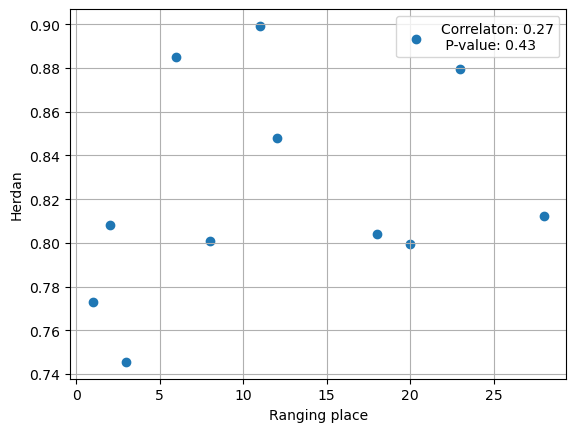

In [61]:
places = [1, 2, 3, 6, 8, 11, 12, 18, 20, 23, 28] #places in the ranging

import scipy.stats as stats
import matplotlib.pyplot as plt
correlation, p_value = stats.pearsonr(places, herdan)

plt.scatter(places, herdan, label=f'Correlaton: {round(correlation,2)}\n P-value: {round(p_value,2)}')
plt.xlabel("Ranging place")
plt.ylabel("Herdan")
plt.legend()
plt.grid()

# Wyświetlenie wykresu
plt.show()